## Student performance dataset

##### importing required libraries for these projects

In [3]:
#importing libraries
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [4]:
df = pd.read_csv('Studentdata_eda.csv')

In [5]:
df.head() #shows top 5 data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#### Dataset info

##### Gender: Gender of the student (male/female)
##### EthnicGroup: Ethnic group of the student (group A to E)
##### ParentEduc: Parent(s) education background (from some high school to master's degree)
##### LunchType: School lunch type (standard or free/reduced
##### TestPrep: Test preparation course followed (completedr no####t)
### ParentMaritalStatus: Parent(s) marital status (married/single/widowedivorc####ed)
### PracticeSport: How often the student practice sport (never/sometimeregula####rly)
### IsFirstChild: If the child is first child in the family  not ye####s/no)
### NrSiblings: Number of siblings the sdent  (0#### to 7)
### TransportMeans: Means of transport to school (sool bus/p####rivate)
### WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10h; more tha####n 10hrs)
### MathScore: mhs test sco####re(0-100)
### ReadingScore: rding test sc####ore(0-100)
### WritingScore: writing test score(0-100)writing test score(0-100)

In [7]:
df.shape #tells the number of rows and columns

(30641, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [9]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [10]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [11]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [12]:
df.isnull().sum()*100/len(df)

Unnamed: 0              0.000000
Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [13]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, Gender, EthnicGroup, ParentEduc, LunchType, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings, TransportMeans, WklyStudyHours, MathScore, ReadingScore, WritingScore]
Index: []


In [14]:
df1 = df.copy()

In [15]:
df1.dropna(subset=['Unnamed: 0','TransportMeans','ParentMaritalStatus'], inplace=True)

In [16]:
df1.shape

(26445, 15)

In [17]:
df1.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1581
ParentEduc             1581
LunchType                 0
TestPrep               1563
ParentMaritalStatus       0
PracticeSport           536
IsFirstChild            784
NrSiblings             1358
TransportMeans            0
WklyStudyHours          834
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [18]:
df1['EthnicGroup'].value_counts()

EthnicGroup
group C    7964
group D    6458
group B    5039
group E    3488
group A    1915
Name: count, dtype: int64

In [19]:
df1['EthnicGroup']=df1['EthnicGroup'].fillna('group C')

In [20]:
df1['TestPrep'].value_counts()

TestPrep
none         16270
completed     8612
Name: count, dtype: int64

In [21]:
df1['TestPrep']=df1['TestPrep'].fillna('none')

In [22]:
df1['WklyStudyHours']=df1['WklyStudyHours'].str.replace("10-May","5-10")

In [23]:
df1['WklyStudyHours'].value_counts()

WklyStudyHours
5 - 10    13974
< 5        7147
> 10       4490
Name: count, dtype: int64

In [24]:
df1['WklyStudyHours']=df1['WklyStudyHours'].fillna(5-10)

In [25]:
df1['IsFirstChild'].value_counts()

IsFirstChild
yes    16460
no      9201
Name: count, dtype: int64

In [26]:
df1['IsFirstChild']=df1['IsFirstChild'].fillna('yes')

In [27]:
df1['NrSiblings'].value_counts()

NrSiblings
1.0    7079
2.0    5873
3.0    5324
0.0    2653
4.0    2544
5.0    1109
7.0     253
6.0     252
Name: count, dtype: int64

In [28]:
df1['ParentEduc'].value_counts()

ParentEduc
some college          5734
high school           4892
associate's degree    4848
some high school      4729
bachelor's degree     2937
master's degree       1724
Name: count, dtype: int64

In [29]:
df1['ParentEduc']=df1['ParentEduc'].fillna('some college')

In [30]:
df1['NrSiblings']=df1['NrSiblings'].fillna(0)

In [31]:
df1.isnull().sum()

Unnamed: 0               0
Gender                   0
EthnicGroup              0
ParentEduc               0
LunchType                0
TestPrep                 0
ParentMaritalStatus      0
PracticeSport          536
IsFirstChild             0
NrSiblings               0
TransportMeans           0
WklyStudyHours           0
MathScore                0
ReadingScore             0
WritingScore             0
dtype: int64

In [32]:
df1['PracticeSport'].value_counts()

PracticeSport
sometimes    13148
regularly     9305
never         3456
Name: count, dtype: int64

In [33]:
df1.isnull().sum()

Unnamed: 0               0
Gender                   0
EthnicGroup              0
ParentEduc               0
LunchType                0
TestPrep                 0
ParentMaritalStatus      0
PracticeSport          536
IsFirstChild             0
NrSiblings               0
TransportMeans           0
WklyStudyHours           0
MathScore                0
ReadingScore             0
WritingScore             0
dtype: int64

### Feature engineering involves creating new features, transforming existing ones, or encoding them to improve the predictive power of your model.

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Sample DataFrame
data = pd.DataFrame({
    "Gender": ["male", "female", "female"],
    "EthnicGroup": ["group A", "group B", "group C"],
    "ParentEduc": ["some high school", "bachelor's degree", "master's degree"],
    "LunchType": ["standard", "free/reduced", "standard"],
    "TestPrep": ["completed", "not completed", "completed"],
    "ParentMaritalStatus": ["married", "single", "divorced"],
    "PracticeSport": ["never", "sometimes", "regularly"],
    "IsFirstChild": ["yes", "no", "yes"],
    "NrSiblings": [1, 2, 0],
    "TransportMeans": ["school bus", "private", "school bus"],
    "WklyStudyHours": ["less than 5hrs", "between 5 and 10hrs", "more than 10hrs"],
    "MathScore": [78, 88, 94],
    "ReadingScore": [81, 89, 95],
    "WritingScore": [79, 85, 92]
})

# 1. Encoding Categorical Variables (One-Hot Encoding)
data = pd.get_dummies(data, columns=["Gender", "EthnicGroup", "LunchType", "TransportMeans"], prefix_sep="_", drop_first=False)

# 2. Encoding Ordinal Variables
education_order = {"some high school": 1, "high school": 2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5}
data["ParentEduc_Encoded"] = data["ParentEduc"].map(education_order)

study_hours_order = {"less than 5hrs": 1, "between 5 and 10hrs": 2, "more than 10hrs": 3}
data["WklyStudyHours_Encoded"] = data["WklyStudyHours"].map(study_hours_order)

# 3. Encoding Binary Variables
data["IsFirstChild_Encoded"] = data["IsFirstChild"].map({"yes": 1, "no": 0})
data["TestPrep_Encoded"] = data["TestPrep"].map({"completed": 1, "not completed": 0})

# 4. Creating New Features
data["TotalScore"] = data["MathScore"] + data["ReadingScore"] + data["WritingScore"]
data["AvgScore"] = data["TotalScore"] / 3
data["IsHighAchiever"] = (data["AvgScore"] > 80).astype(int)

# 5. Binning Numerical Variables
data["NrSiblings_Binned"] = pd.cut(data["NrSiblings"], bins=[-1, 0, 2, 7], labels=["No siblings", "Few siblings", "Many siblings"])
data["MathScore_Binned"] = pd.cut(data["MathScore"], bins=[0, 50, 80, 100], labels=["Low", "Medium", "High"])

# 6. Interaction Features
data["SportStudyInteraction"] = data["PracticeSport"] + "_" + data["WklyStudyHours"]

print(data.head())


          ParentEduc       TestPrep ParentMaritalStatus PracticeSport  \
0   some high school      completed             married         never   
1  bachelor's degree  not completed              single     sometimes   
2    master's degree      completed            divorced     regularly   

  IsFirstChild  NrSiblings       WklyStudyHours  MathScore  ReadingScore  \
0          yes           1       less than 5hrs         78            81   
1           no           2  between 5 and 10hrs         88            89   
2          yes           0      more than 10hrs         94            95   

   WritingScore  ...  ParentEduc_Encoded  WklyStudyHours_Encoded  \
0            79  ...                   1                       1   
1            85  ...                   4                       2   
2            92  ...                   5                       3   

   IsFirstChild_Encoded  TestPrep_Encoded  TotalScore   AvgScore  \
0                     1                 1         238  79.333

##### Feature Scaling:Feature scaling is a technique used in data preprocessing to standardize or normalize the range of independent variables or features in a dataset. It is commonly applied to ensure that all features contribute equally to the analysis or machine learning model, particularly when they are measured on different scales.

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data
data = pd.DataFrame({
    "Gender": ["male", "female", "male"],
    "EthnicGroup": ["A", "B", "C"],
    "ParentEduc": ["some high school", "bachelor's degree", "master's degree"],
    "LunchType": ["standard", "free/reduced", "standard"],
    "TestPrep": ["completed", "not", "completed"],
    "ParentMaritalStatus": ["married", "single", "divorced"],
    "PracticeSport": ["regularly", "never", "sometimes"],
    "IsFirstChild": ["yes", "no", "yes"],
    "NrSiblings": [2, 3, 1],
    "TransportMeans": ["school bus", "private", "school bus"],
    "WklyStudyHours": ["more than 10hrs", "less than 5hrs", "between 5 and 10hrs"],
    "MathScore": [80, 70, 90],
    "ReadingScore": [85, 75, 95],
    "WritingScore": [78, 68, 88],
})

# Select numerical features
numerical_features = ["NrSiblings", "MathScore", "ReadingScore", "WritingScore"]

# Handle missing values (if any)
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Standardized Data:\n", data)


Standardized Data:
    Gender EthnicGroup         ParentEduc     LunchType   TestPrep  \
0    male           A   some high school      standard  completed   
1  female           B  bachelor's degree  free/reduced        not   
2    male           C    master's degree      standard  completed   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes    0.000000     school bus   
1              single         never           no    1.224745        private   
2            divorced     sometimes          yes   -1.224745     school bus   

        WklyStudyHours  MathScore  ReadingScore  WritingScore  
0      more than 10hrs   0.000000      0.000000      0.000000  
1       less than 5hrs  -1.224745     -1.224745     -1.224745  
2  between 5 and 10hrs   1.224745      1.224745      1.224745  


### Gender Distribution

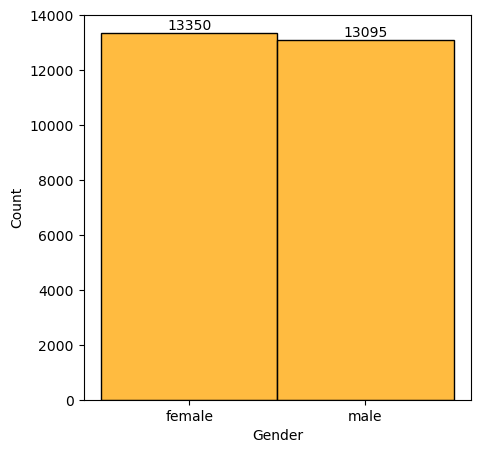

In [141]:
plt.figure(figsize= (5,5)) 
ax = sns.histplot(data = df1, x = "Gender",color="orange") 
ax.bar_label(ax.containers[0])
plt.show()

##### From the above graph we can observe that the number of females in the dataset are more than the number of males

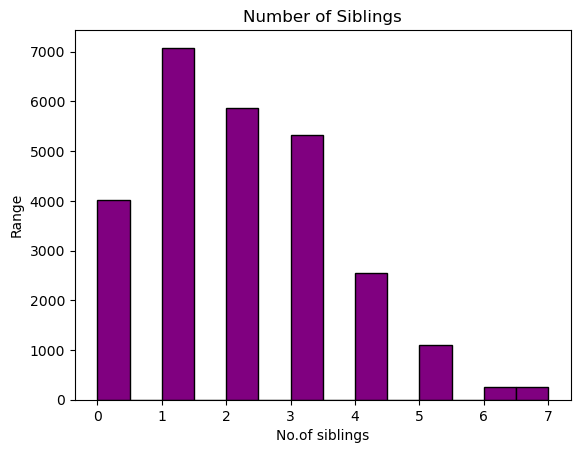

In [41]:
import matplotlib.pyplot as plt

# Histogram for a specific column 
df1['NrSiblings'].plot(kind='hist', bins=14, color='purple',edgecolor='black')
plt.title('Number of Siblings')
plt.xlabel('No.of siblings')
plt.ylabel('Range')
plt.show()


From the above graph we can say that the single siblings are more for the most of the students and very less studenets are having 6 or 7 siblings. 

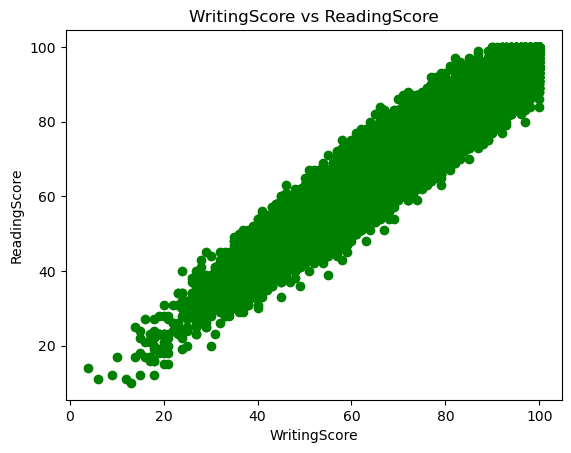

In [43]:
# Scatter plot between two numerical variables 
plt.scatter(df1['WritingScore'], df1['ReadingScore'], color='green')
plt.title('WritingScore vs ReadingScore')
plt.xlabel('WritingScore')
plt.ylabel('ReadingScore')
plt.show()


The scatter plot illustrates the relationship between two numerical variables: "WritingScore" and "ReadingScore". The data points are densely clustered, forming a strong positive linear trend. This suggests a positive correlation between the two variables; as WritingScore increases, ReadingScore also tends to increase.

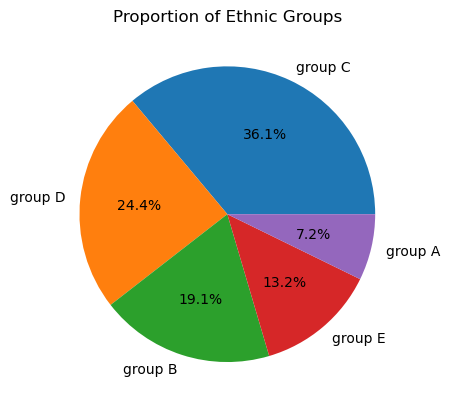

In [45]:
# Pie chart for a categorical variable (e.g., 'gender')
df1['EthnicGroup'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Ethnic Groups')
plt.ylabel('')
plt.show()


From the above graph we can say that most of the students are from the group-c ethnic group and least students are from the group-a 

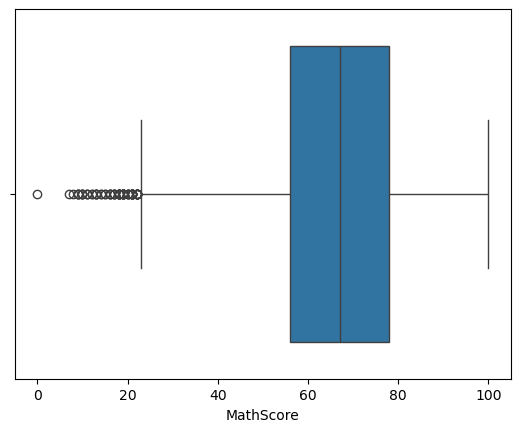

In [47]:
sns.boxplot(data=df1,x='MathScore')
plt.show()

The box plot displays the distribution of the "MathScore" variable. It reveals a right-skewed distribution, suggesting that a majority of students scored relatively low in Math, while a few students scored exceptionally high.

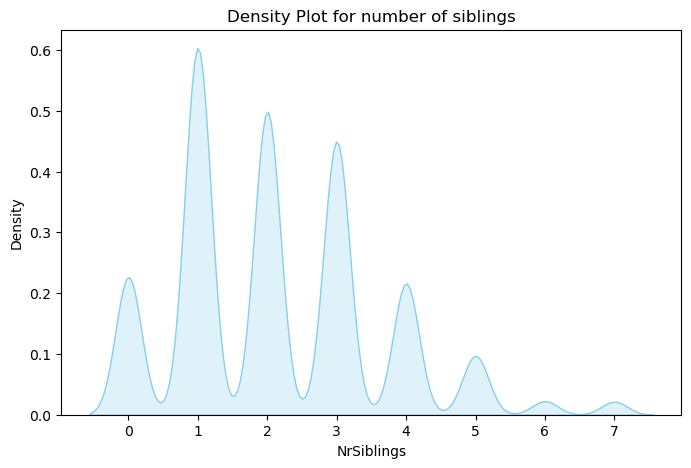

In [143]:
# Density Plot 
plt.figure(figsize=(8, 5)) 
sns.kdeplot(df['NrSiblings'], fill=True, color='skyblue') 
plt.title('Density Plot for number of siblings') 
plt.show()

From the above graph we can say that the single siblings are more for the most of the students and very less studenets are having 6 or 7 siblings. 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3664\1885259663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ParentEduc', y='NrSiblings', data=df1, palette='viridis')


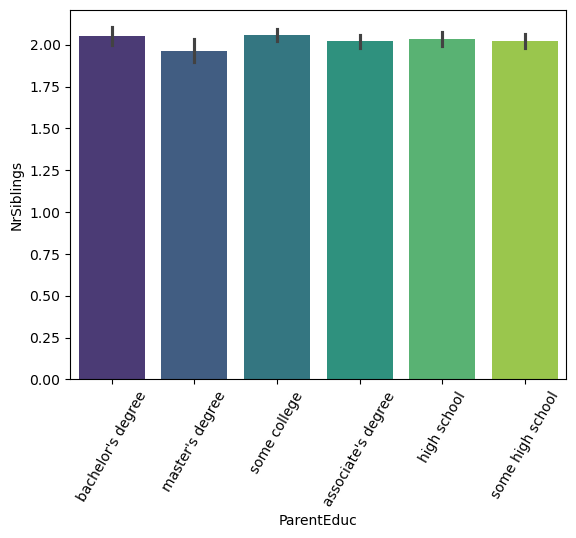

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x='ParentEduc', y='NrSiblings', data=df1, palette='viridis') 
plt.xticks(rotation=60)
plt.show()

The bar plot shows the average number of siblings for students whose parents have different levels of education.Overall, there is not a significant difference in the average number of siblings across different parental education levels. The bars are all relatively close in height, indicating that, on average, students from families with different parental education levels tend to have a similar number of siblings.

#### multivariet analysis

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, "master's degree"),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

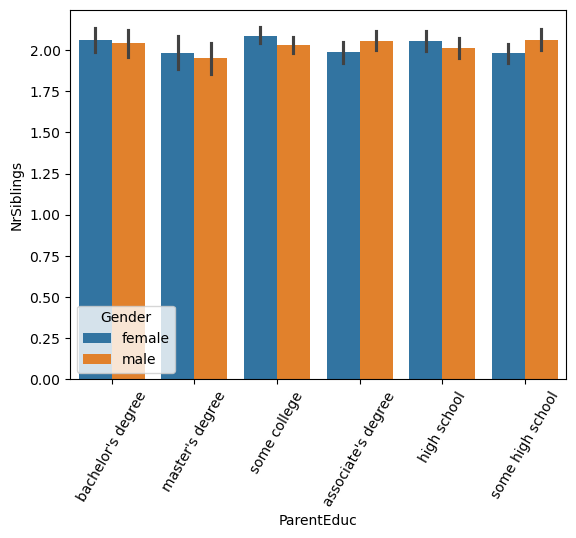

In [54]:
sns.barplot(x='ParentEduc', y='NrSiblings', data=df1,hue = df1['Gender'])
plt.xticks(rotation = 60)

Bachelor's Degree: Female students whose parents have a bachelor's degree tend to have slightly more siblings compared to male students with similar parental education.
High School and Some High School: Male students whose parents have a high school or some high school education tend to have slightly more siblings compared to female students with similar parental education.

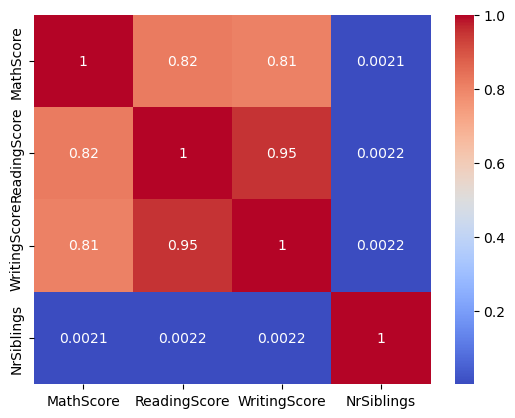

In [56]:
sns.heatmap(df1[['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']].corr(), annot=True, cmap="coolwarm")
plt.show()


The heatmap reveals that Math, Reading, and Writing scores are strongly related, while the number of siblings has a negligible impact on these scores. This suggests that factors like cognitive abilities, study habits, or teaching quality might be more influential in determining student performance in these subjects than the number of siblings.

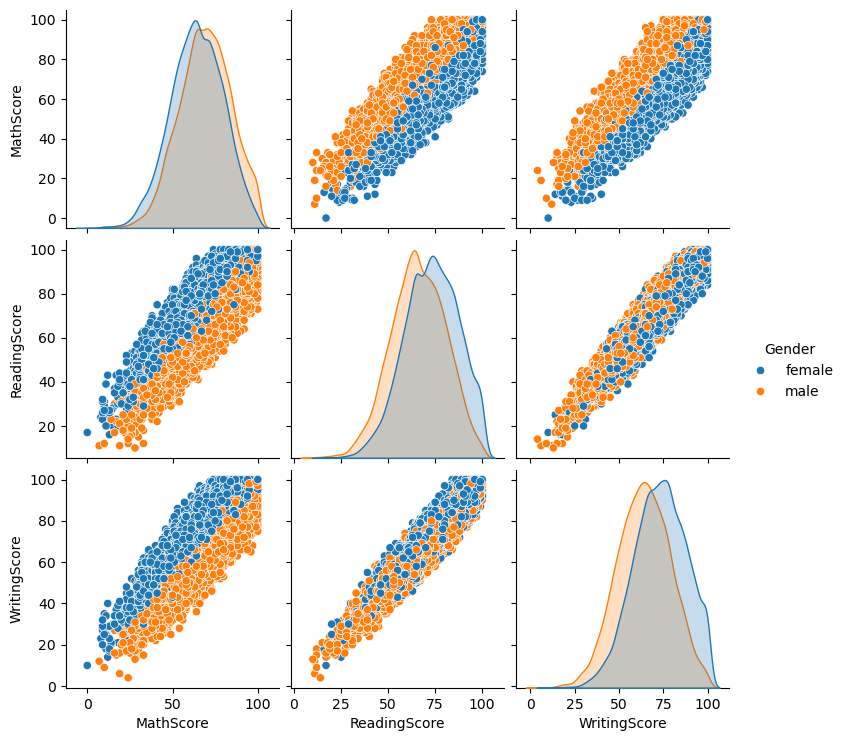

In [58]:
import seaborn as sns
sns.pairplot(df1[['MathScore', 'ReadingScore', 'WritingScore', 'Gender']], hue='Gender')

The scatter plots off the diagonal reveal strong positive correlations between Math, Reading, and Writing scores. This suggests that students who perform well in one subject tend to perform well in the others as well. There could be underlying factors such as cognitive abilities, study habits, or access to resources that contribute to this pattern.

The color coding distinguishes between male and female students. There appears to be a subtle gender difference in the distributions of Math and Reading scores.Female students tend to have a slightly higher average score in Reading compared to male students.In Math, there is a slight overlap between the distributions of male and female students, with a trend suggesting females might have a slight advantage.

The strong positive correlations between the three subjects suggest that shared underlying factors, such as cognitive abilities, study habits, or access to resources, play a significant role in student performance. The observed gender differences in Reading and Math scores could be attributed to various factors, including societal expectations, educational opportunities, or biological differences.

<Axes: xlabel='LunchType', ylabel='MathScore'>

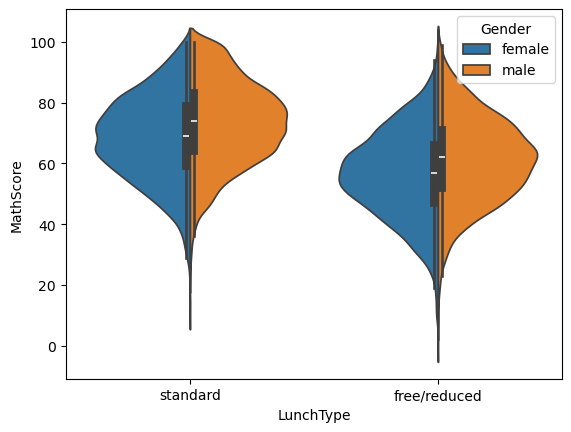

In [60]:
sns.violinplot(x="LunchType", y="MathScore", hue="Gender", data=df1, split=True)


Distribution Shape: The violin plots show that the distribution of Math scores is roughly bell-shaped for both lunch types, with some slight skewness.

Median and Quartiles: The black bars within each violin represent the median and quartiles of the distribution. The median is the middle line, and the quartiles mark the 25th and 75th percentiles.

Standard Lunch: Students who receive standard lunch tend to have higher Math scores overall. The violin plot for standard lunch is shifted to the right, indicating a higher average score compared to those on free/reduced lunch.

Free/Reduced Lunch: Students who receive free/reduced lunch tend to have lower Math scores on average. The violin plot for free/reduced lunch is shifted to the left, indicating a lower average score.

In [62]:
pass_mark = 50
df1["total_score"]=round((df1["MathScore"] + df1["ReadingScore"] + df1["WritingScore"]) /3,2)

<Axes: xlabel='total_score', ylabel='Count'>

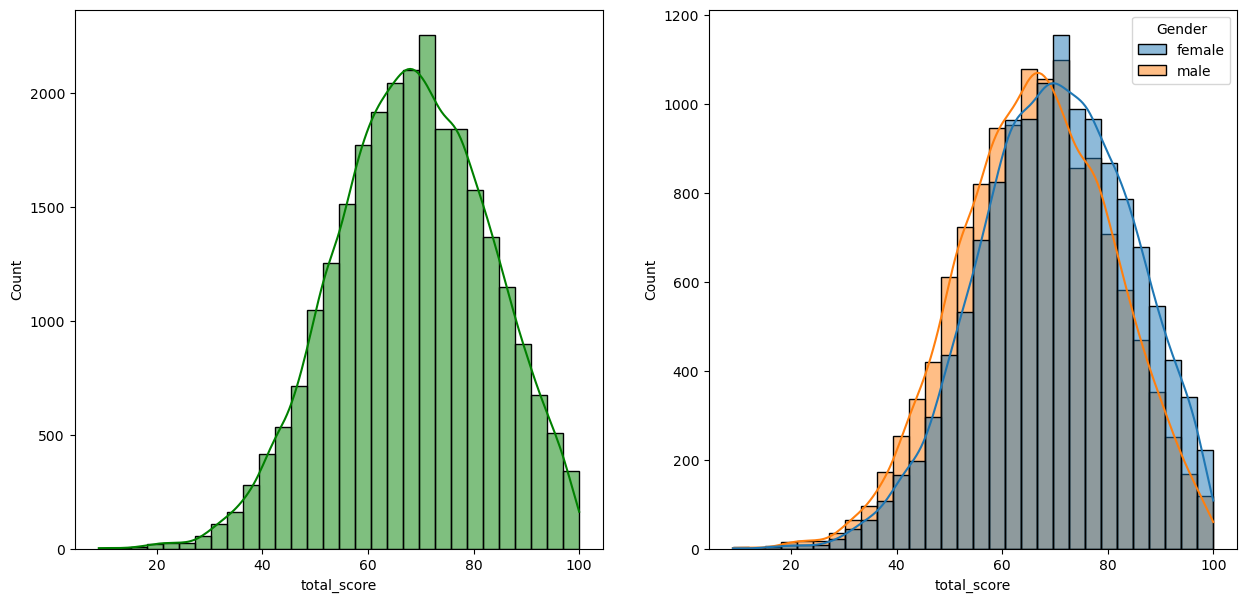

In [63]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df1,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df1,x='total_score',bins=30,kde=True,hue='Gender')

The histograms you provided show the distribution of the total score (MathScore + ReadingScore + WritingScore) for the entire dataset and separately by gender.

The histogram for the entire dataset shows a bell-shaped distribution, which is characteristic of a normal distribution. This indicates that the total scores are centered around a specific value, and most students have scores close to this average.

Both male and female students exhibit a similar bell-shaped distribution. This suggests that the overall distribution of total scores is not significantly different between genders.

However, there seems to be a slight rightward shift in the distribution for female students. This indicates that, on average, female students tend to have slightly higher total scores compared to male students.

Normal Distribution: The bell-shaped distribution of total scores suggests that the underlying factors influencing student performance, such as cognitive abilities, study habits, or access to resources, are likely normally distributed in the population.

Gender Differences: The slight rightward shift in the distribution for female students could be attributed to various factors, including societal expectations, educational opportunities, or biological differences. However, further research is needed to confirm these potential explanations.

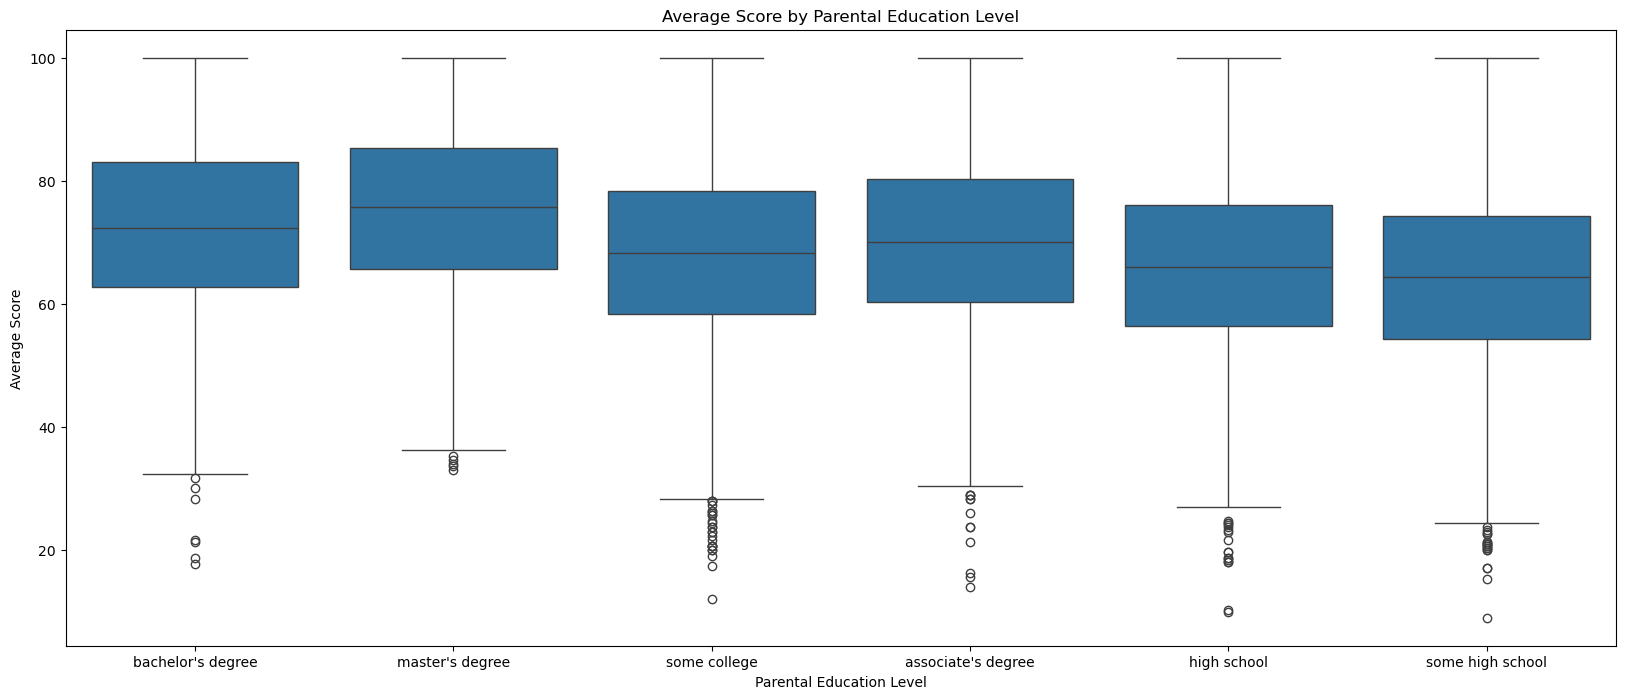

In [65]:
plt.figure(figsize=(20, 8))

sns.boxplot(data=df1, x='ParentEduc', y='total_score')

plt.title('Average Score by Parental Education Level')

plt.xlabel('Parental Education Level')

plt.ylabel('Average Score')

plt.show()

### Insights
Female students have performed well than male students

In [67]:
df1["did_pass"] = False
df1["did_pass"]=df1["total_score"]>pass_mark

In [68]:
df1["did_pass"].value_counts()

did_pass
True     23562
False     2883
Name: count, dtype: int64

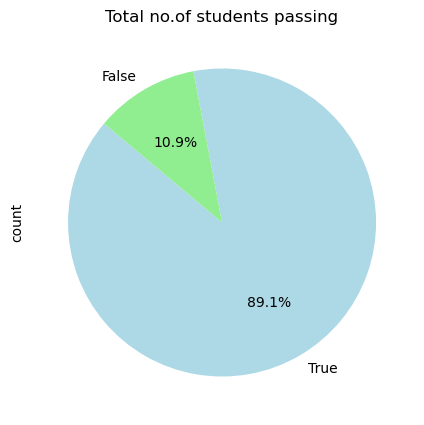

In [149]:
# Advanced Pie Chart 
plt.figure(figsize=(8, 5)) 
df1['did_pass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140) 
 
# Adding labels and title 
plt.title('Total no.of students passing')  
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3664\391232219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Gender", data=df1[df1["did_pass"] == True], palette="viridis")


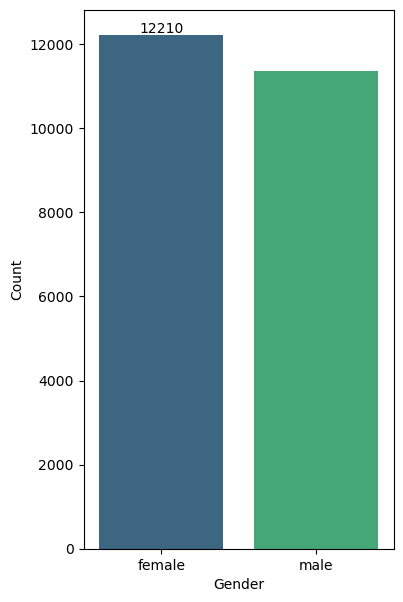

In [69]:
# Plotting the graph between gender and student passed
plt.figure(figsize=(4, 7))

ax = sns.countplot(x="Gender", data=df1[df1["did_pass"] == True], palette="viridis") 
ax.bar_label(ax.containers[0])

plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

This graph shows that the female students are passing more then compared to male in the student performance dataset

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3664\2292411415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="EthnicGroup",data = df1[df1["did_pass"] == True],palette="viridis")


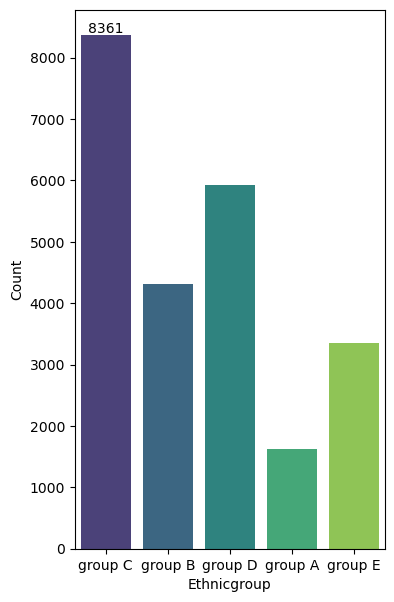

In [71]:
 #ploting the graph between ethnicgroup and student passedd
plt.figure(figsize = (4,7))
ax=sns.countplot(x="EthnicGroup",data = df1[df1["did_pass"] == True],palette="viridis")
ax.bar_label(ax.containers[0])
plt.xlabel("Ethnicgroup")
plt.ylabel("Count")
plt.show()

This group shows that from the Ethnic Group-c people are passsing more and the least passing are from the Group-a 

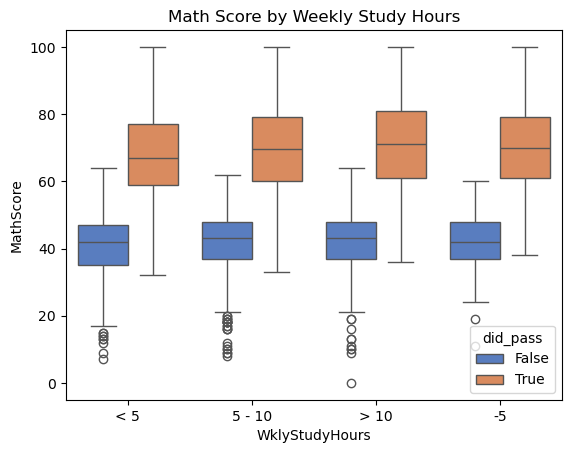

In [156]:
sns.boxplot(data=df1, x='WklyStudyHours', y='MathScore', hue='did_pass', palette='muted')
plt.title('Math Score by Weekly Study Hours')
plt.show()


There seems to be a positive trend between study hours and math scores. As the number of weekly study hours increases, the median math score tends to rise.
The boxplots for students who studied more than 10 hours per week show a wider range of math scores, indicating greater variability in performance within this group.

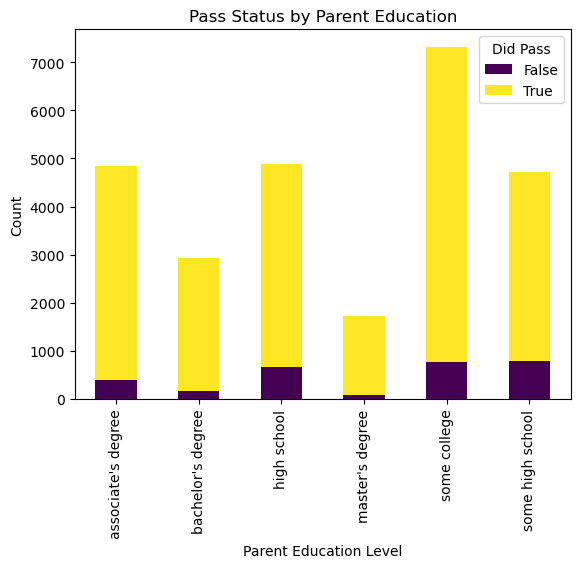

In [153]:
pd.crosstab(df1['ParentEduc'], df1['did_pass']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Pass Status by Parent Education')
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.legend(title='Did Pass')
plt.show()


There appears to be a positive correlation between the level of parental education and the likelihood of passing.As the level of parental education increases, the proportion of students who pass tends to increase.The graph suggests that parental education plays a role in student success. However, it's important to remember that this is just one factor among many that influence student outcomes. 

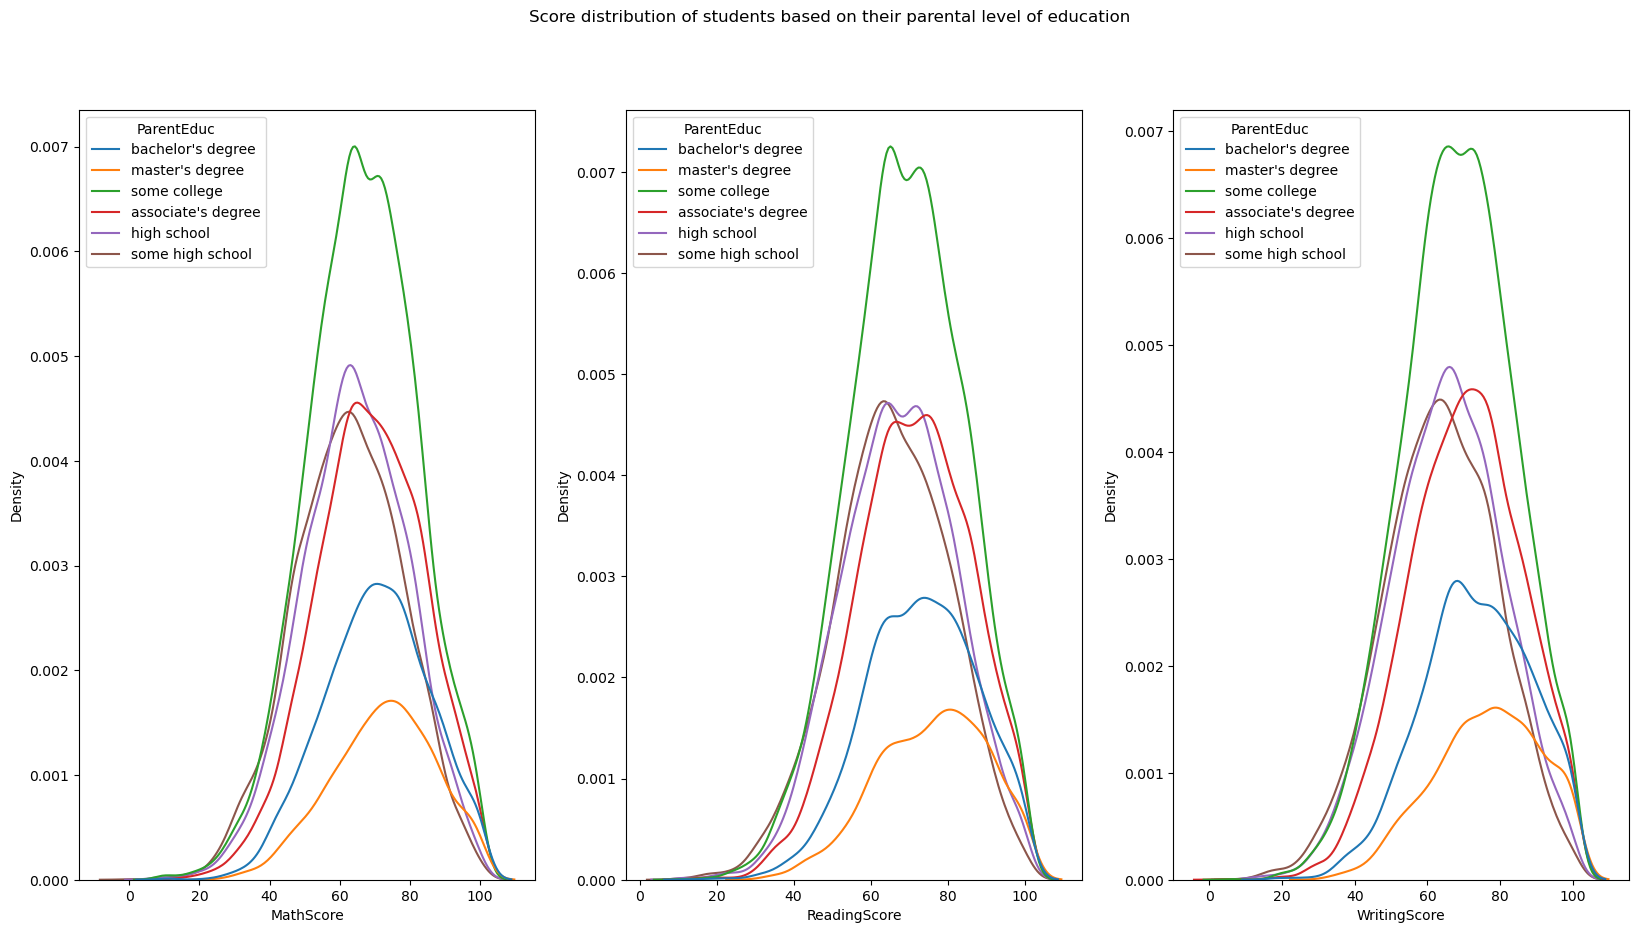

In [75]:
fig,ax=plt.subplots(ncols=3, figsize =(20,10))
fig.suptitle('Score distribution of students based on their parental level of education')
a= sns.kdeplot(data=df1,x="MathScore",ax=ax[0],hue='ParentEduc')
b= sns.kdeplot(data=df1,x="ReadingScore",ax=ax[1],hue='ParentEduc')
c= sns.kdeplot(data=df1,x="WritingScore",ax=ax[2],hue='ParentEduc')

sns.move_legend(a,"upper left",bbox_to_anchor=(0, 1))
sns.move_legend(b,"upper left",bbox_to_anchor=(0, 1))
sns.move_legend(c,"upper left",bbox_to_anchor=(0, 1))

Math Score: Students whose parents have a bachelor's degree, master's degree, or some college tend to have higher Math scores compared to those whose parents have an associate's degree, high school diploma, or some high school education.

Reading Score: A similar pattern is observed for Reading scores. Students whose parents have higher levels of education tend to have higher Reading scores.

Writing Score: The impact of parental education on Writing scores seems to be less pronounced compared to Math and Reading. However, there is still a noticeable trend of higher Writing scores for students whose parents have higher levels of education.

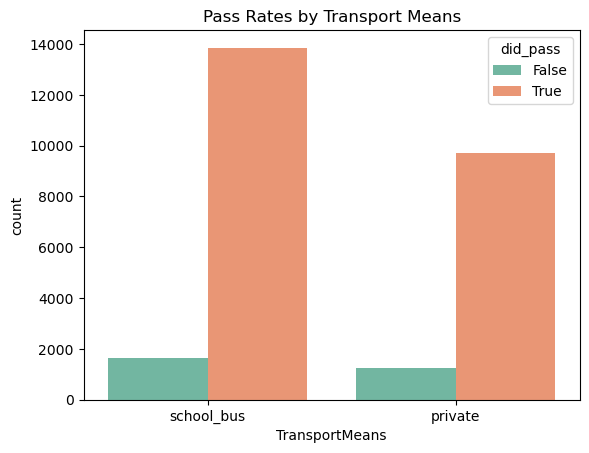

In [164]:
sns.countplot(data=df1, x='TransportMeans', hue='did_pass', palette='Set2')
plt.title('Pass Rates by Transport Means')
plt.show()


The countplot suggests that students who travel privately have a higher likelihood of passing compared to those who use the school bus. However, further analysis with more data and context is needed to draw definitive conclusions about the relationship between transport means and passing rates.

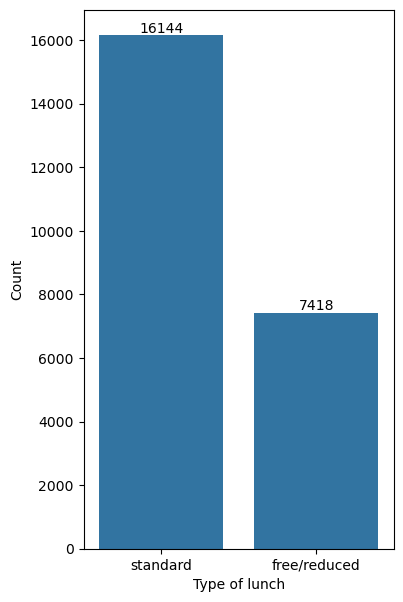

In [77]:
 #ploting the graph between type of lunch and student passedd
plt.figure(figsize = (4,7))
ax=sns.countplot(x="LunchType",data = df1[df1["did_pass"] == True])
ax.bar_label(ax.containers[0])
plt.xlabel("Type of lunch")
plt.ylabel("Count")
plt.show()

Thhis graph shows that most of the students who are having standard lunch are passing more than compared to the students who are having free/reduced lunch type

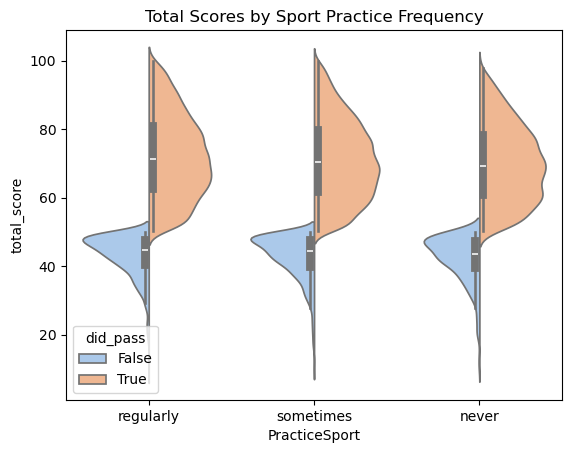

In [172]:
sns.violinplot(data=df1, x='PracticeSport', y='total_score', hue='did_pass', split=True, palette='pastel')
plt.title('Total Scores by Sport Practice Frequency')
plt.show()


Regularly: Students who practice sports regularly have a higher concentration of passing scores (orange) compared to failing scores (blue). The distribution of passing scores is wider and higher.

Sometimes: Students who practice sports sometimes also show a higher concentration of passing scores, but the distribution is slightly narrower compared to those who practice regularly.

Never: Students who never practice sports have a similar pattern, with passing scores being more concentrated and higher than failing scores, but the distribution is the narrowest among the three categories.

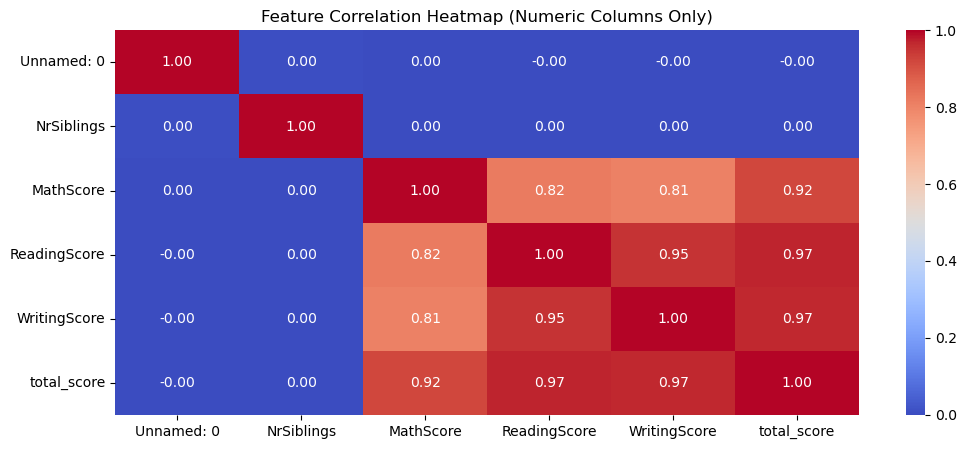

In [79]:

numeric_df = df1.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 5))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap (Numeric Columns Only)')

plt.show()

Observation:math_score, reading_score, and writing_score are highly correlated with each other and with the average_score, indicating that these scores are important predictors for the target variable.

The strong positive correlations between Math, Reading, Writing, and total score suggest that shared underlying factors, such as cognitive abilities, study habits, or access to resources, play a significant role in student performance.

The weak correlation between NrSiblings and the other variables suggests that the number of siblings has a limited impact on academic performance. This could be due to various factors, such as family dynamics, socioeconomic status, or individual differences in learning styles.

Explained variance ratio by each principal component:
[0.83328997 0.16671003]

Cumulative explained variance:
[0.83328997 1.        ]


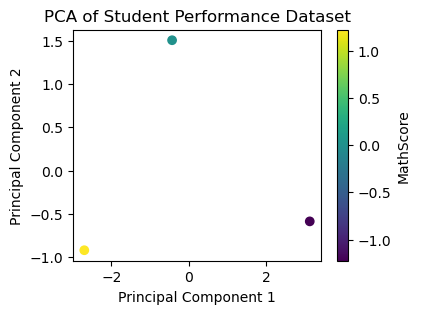


Data with PCA components:
   Gender EthnicGroup         ParentEduc     LunchType   TestPrep  \
0    male           A   some high school      standard  completed   
1  female           B  bachelor's degree  free/reduced        not   
2    male           C    master's degree      standard  completed   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes    0.000000     school bus   
1              single         never           no    1.224745        private   
2            divorced     sometimes          yes   -1.224745     school bus   

        WklyStudyHours  MathScore  ReadingScore  WritingScore       PC1  \
0      more than 10hrs   0.000000      0.000000      0.000000 -0.429480   
1       less than 5hrs  -1.224745     -1.224745     -1.224745  3.125465   
2  between 5 and 10hrs   1.224745      1.224745      1.224745 -2.695986   

        PC2  
0  1.503327  
1 -0.585301  
2 -0.918026  


In [81]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
# Assuming `data` is your DataFrame

# Step 1: Preprocessing

# Fill missing values
categorical_columns = ['Gender', 'EthnicGroup', 'LunchType', 'TestPrep', 
                       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 
                       'TransportMeans', 'WklyStudyHours']
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

# Impute missing values for categorical and numerical data
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='median')
data[categorical_columns] = imputer_cat.fit_transform(data[categorical_columns])
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])

# Encode categorical variables
encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data[numerical_columns])

# Combine all features
X = pd.concat([encoded_data, pd.DataFrame(scaled_numerical_data, columns=numerical_columns)], axis=1)

# Step 2: Apply PCA

# Initialize PCA and fit the data
pca = PCA(n_components=2)  # You can choose the number of components or set it to a desired value
principal_components = pca.fit_transform(X)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the principal components to the original data (optional)
data_with_pca = pd.concat([data, pca_df], axis=1)

# Step 3: Analyze the Results

# Explained variance ratio
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

# Cumulative explained variance
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

# Visualizing the first two principal components
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data['MathScore'], cmap='viridis')
plt.title('PCA of Student Performance Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='MathScore')
plt.show()

# Print the resulting DataFrame with principal components
print("\nData with PCA components:")
print(data_with_pca.head())


The dots in the PCA plot represent individual data points, which in this case are likely individual students. Each dot is plotted based on its coordinates on the two principal components (PC1 and PC2).

The color of each dot corresponds to the MathScore of the student. This color-coding helps visualize how the MathScore varies across different points in the PCA space.

In [83]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Example dataset
data = pd.DataFrame({
    'Gender': ['male', 'female', 'male'],
    'EthnicGroup': ['group A', 'group B', 'group C'],
    'ParentEduc': ['some high school', 'bachelor\'s degree', 'master\'s degree'],
    'LunchType': ['standard', 'free/reduced', 'standard'],
    'TestPrep': ['completed', 'not', 'not'],
    'ParentMaritalStatus': ['married', 'single', 'divorced'],
    'PracticeSport': ['never', 'sometimes', 'regularly'],
    'IsFirstChild': ['yes', 'no', 'yes'],
    'NrSiblings': [0, 2, 1],
    'TransportMeans': ['school bus', 'private', 'private'],
    'WklyStudyHours': ['less than 5hrs', 'between 5 and 10hrs', 'more than 10hrs'],
    'MathScore': [78, 65, 89],
    'ReadingScore': [85, 70, 90],
    'WritingScore': [80, 75, 92]
})

# 1. Encode categorical features without overwriting original columns
def feature_engineering(df):
    new_data = df.copy()
    
    # One-hot encode categorical features
    onehot_cols = ['Gender', 'EthnicGroup', 'LunchType', 'TransportMeans', 'WklyStudyHours']
    onehot_encoded = pd.get_dummies(new_data[onehot_cols], prefix=onehot_cols, drop_first=True)
    
    # Label encode ordinal features
    ordinal_mapping = {
        'ParentEduc': {'some high school': 1, 'high school': 2, 'some college': 3, "associate's degree": 4, 
                       "bachelor's degree": 5, "master's degree": 6},
        'TestPrep': {'not': 0, 'completed': 1},
        'PracticeSport': {'never': 0, 'sometimes': 1, 'regularly': 2},
        'IsFirstChild': {'no': 0, 'yes': 1},
        'ParentMaritalStatus': {'married': 0, 'single': 1, 'widowed': 2, 'divorced': 3},
    }
    
    for col, mapping in ordinal_mapping.items():
        new_data[f"{col}_encoded"] = new_data[col].map(mapping)
    
    # Merge one-hot encoded data
    new_data = pd.concat([new_data, onehot_encoded], axis=1)
    
    return new_data

# Apply feature engineering
processed_data = feature_engineering(data)
print(processed_data.head())


   Gender EthnicGroup         ParentEduc     LunchType   TestPrep  \
0    male     group A   some high school      standard  completed   
1  female     group B  bachelor's degree  free/reduced        not   
2    male     group C    master's degree      standard        not   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married         never          yes           0     school bus   
1              single     sometimes           no           2        private   
2            divorced     regularly          yes           1        private   

   ... PracticeSport_encoded  IsFirstChild_encoded  \
0  ...                     0                     1   
1  ...                     1                     0   
2  ...                     2                     1   

   ParentMaritalStatus_encoded  Gender_male  EthnicGroup_group B  \
0                            0         True                False   
1                            1        False          